In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)
sns.set_palette("muted")
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv('Data.csv')

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [6]:
data.shape

(25000, 24)

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.711560,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.418120,16.064329,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.656880,0.474761,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.537320,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.944398,7.872534,10.0,24.0,28.0,33.0,98.0


In [10]:
data.drop(['Ware_house_ID','WH_Manager_ID'], axis = 1, inplace = True)

In [11]:
data.shape

(25000, 22)

<b> Null values treatment

In [12]:
data.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

data.isnull().sum().sum()

13779/25000

990/25000

908/25000

11881/25000

In [18]:
data.ffill(axis='rows', inplace=True)

In [19]:
data.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     4
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [20]:
data["wh_est_year"].describe()

count    24996.000000
mean      2009.418107
std          7.529156
min       1996.000000
25%       2003.000000
50%       2009.000000
75%       2016.000000
max       2023.000000
Name: wh_est_year, dtype: float64

In [21]:
data["wh_est_year"] = data["wh_est_year"].fillna(data["wh_est_year"].median())

In [22]:
data.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

<b> Separating Categorical & Numerical Variables for Analysis

In [23]:
data_con = data[['retail_shop_num','distributor_num','dist_from_hub','workers_num','storage_issue_reported_l3m','govt_check_l3m','product_wg_ton']]

In [24]:
data_cat = data[['Competitor_in_mkt','num_refill_req_l3m','transport_issue_l1y','wh_breakdown_l3m','temp_reg_mach','electric_supply','flood_proof','flood_impacted','Location_type','WH_capacity_size','zone','WH_regional_zone','wh_owner_type','wh_est_year','approved_wh_govt_certificate']]

In [25]:
b= np.arange(0,15) 
a= np.arange(0,7)

In [26]:
data_con_col = data_con.columns
data_cat_col = data_cat.columns

<b> Outlier identification & treatment

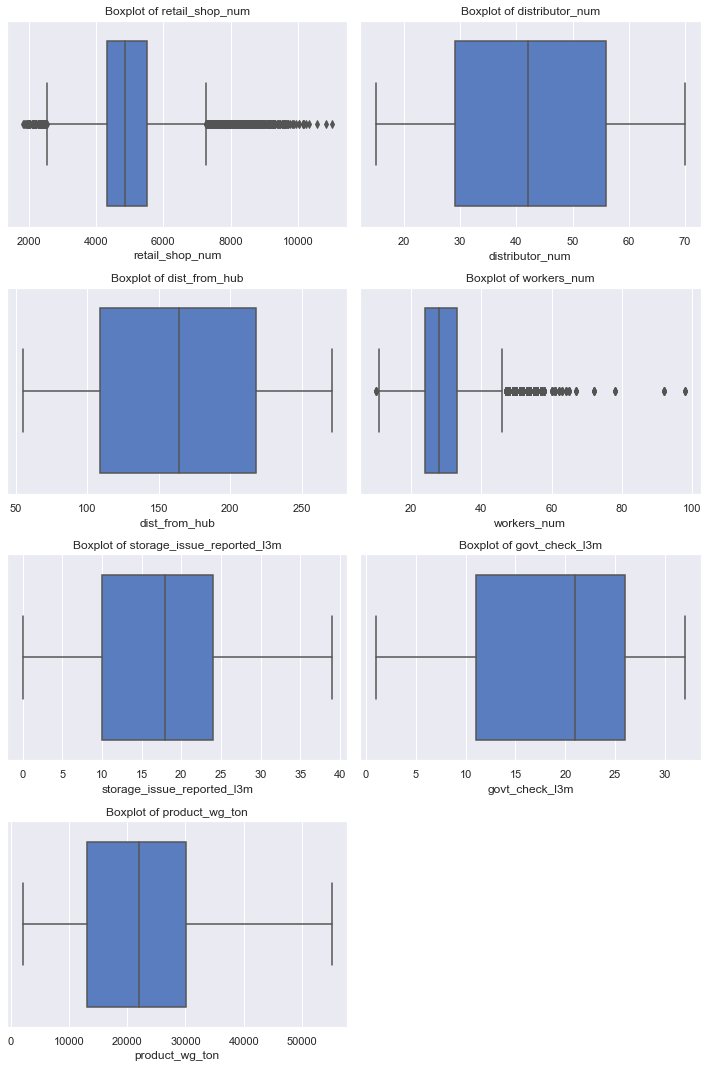

In [27]:
plt.figure(figsize=(10,15))
for i in a:
    plt.subplot(4,2,i+1);
    sns.boxplot(data_con[data_con_col[i]]);
    plt.title("Boxplot of {}".format(data_con_col[i]))
    plt.tight_layout();

In [28]:
Q1 = data_con.quantile(0.25)
Q3 = data_con.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

((data_con > UL) | (data_con < LL)).sum()

In [30]:
((data_con > UL) | (data_con < LL)).sum().sum()

1579

1579/(25000*22)

948/(25000)

631/25000

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
lr2,ur2=remove_outlier(data['workers_num'])
data['workers_num']=np.where(data['workers_num']>ur2,ur2,data['workers_num'])
data['workers_num']=np.where(data['workers_num']<lr2,lr2,data['workers_num'])


lr1,ur1=remove_outlier(data['retail_shop_num'])
data['retail_shop_num']=np.where(data['retail_shop_num']>ur1,ur1,data['retail_shop_num'])
data['retail_shop_num']=np.where(data['retail_shop_num']<lr1,lr1,data['retail_shop_num'])

print(lr1,ur1)

print (lr2,ur2)

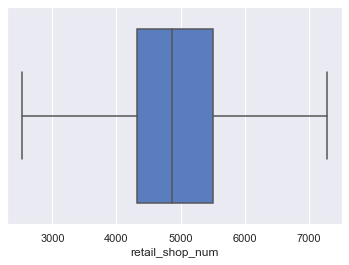

In [33]:
sns.boxplot(data['retail_shop_num']);

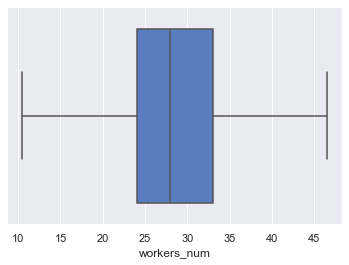

In [34]:
sns.boxplot(data['workers_num']);

In [35]:
lr4,ur4=remove_outlier(data_con['workers_num'])
data_con['workers_num']=np.where(data_con['workers_num']>ur4,ur4,data_con['workers_num'])
data_con['workers_num']=np.where(data_con['workers_num']<lr4,lr4,data_con['workers_num'])


lr3,ur3=remove_outlier(data_con['retail_shop_num'])
data_con['retail_shop_num']=np.where(data_con['retail_shop_num']>ur1,ur1,data_con['retail_shop_num'])
data_con['retail_shop_num']=np.where(data_con['retail_shop_num']<lr1,lr1,data_con['retail_shop_num'])

print(lr3,ur3)

print(lr4,ur4)

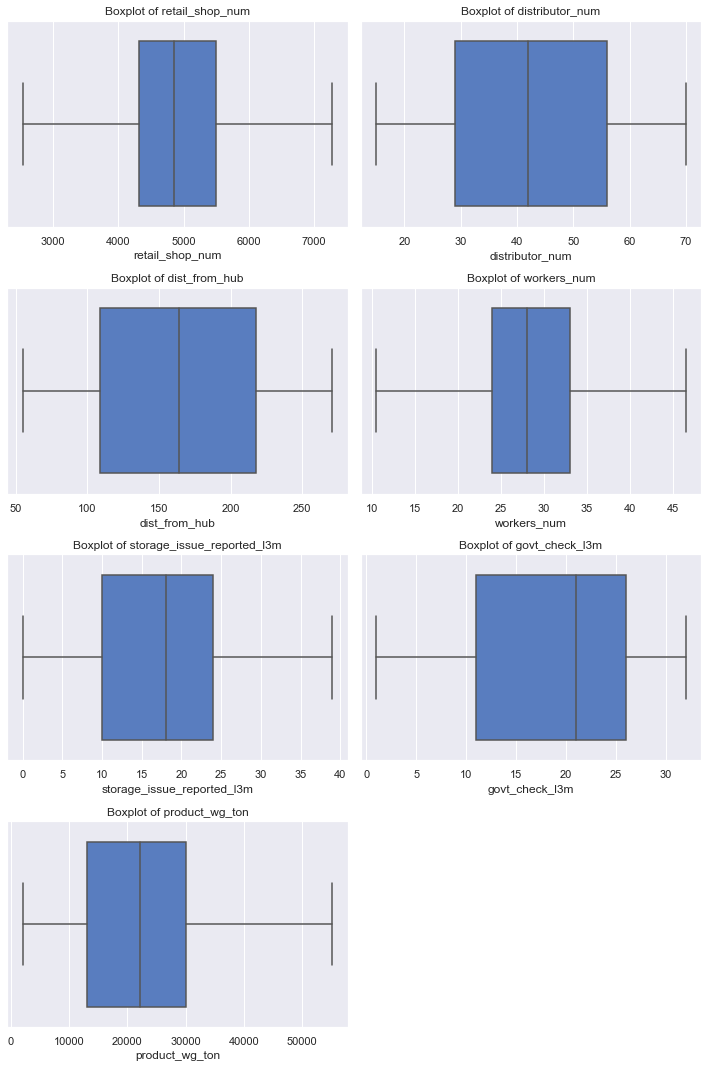

In [36]:
plt.figure(figsize=(10,15))
for i in a:
    plt.subplot(4,2,i+1);
    sns.boxplot(data_con[data_con_col[i]]);
    plt.title("Boxplot of {}".format(data_con_col[i]))
    plt.tight_layout();

## EDA

<b> Univariate analysis

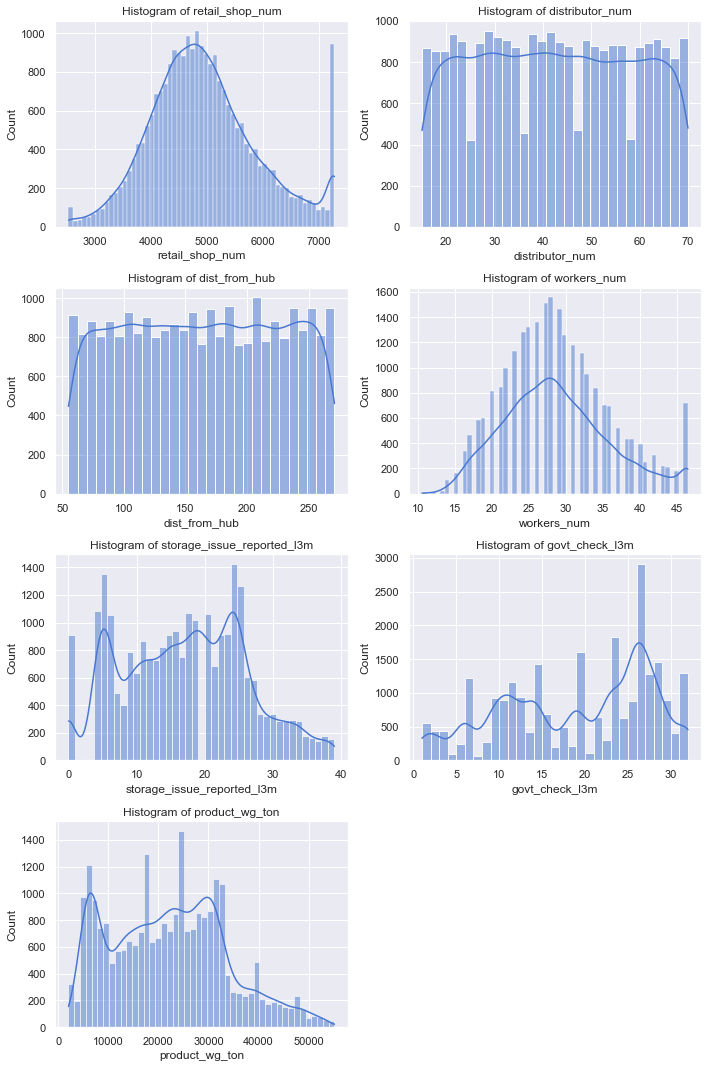

In [44]:
plt.figure(figsize=(10,15))
for i in a:
    plt.subplot(4,2,i+1);
    sns.histplot(data_con[data_con_col[i]], kde=True);
    plt.title("Histogram of {}".format(data_con_col[i]))
    plt.tight_layout();

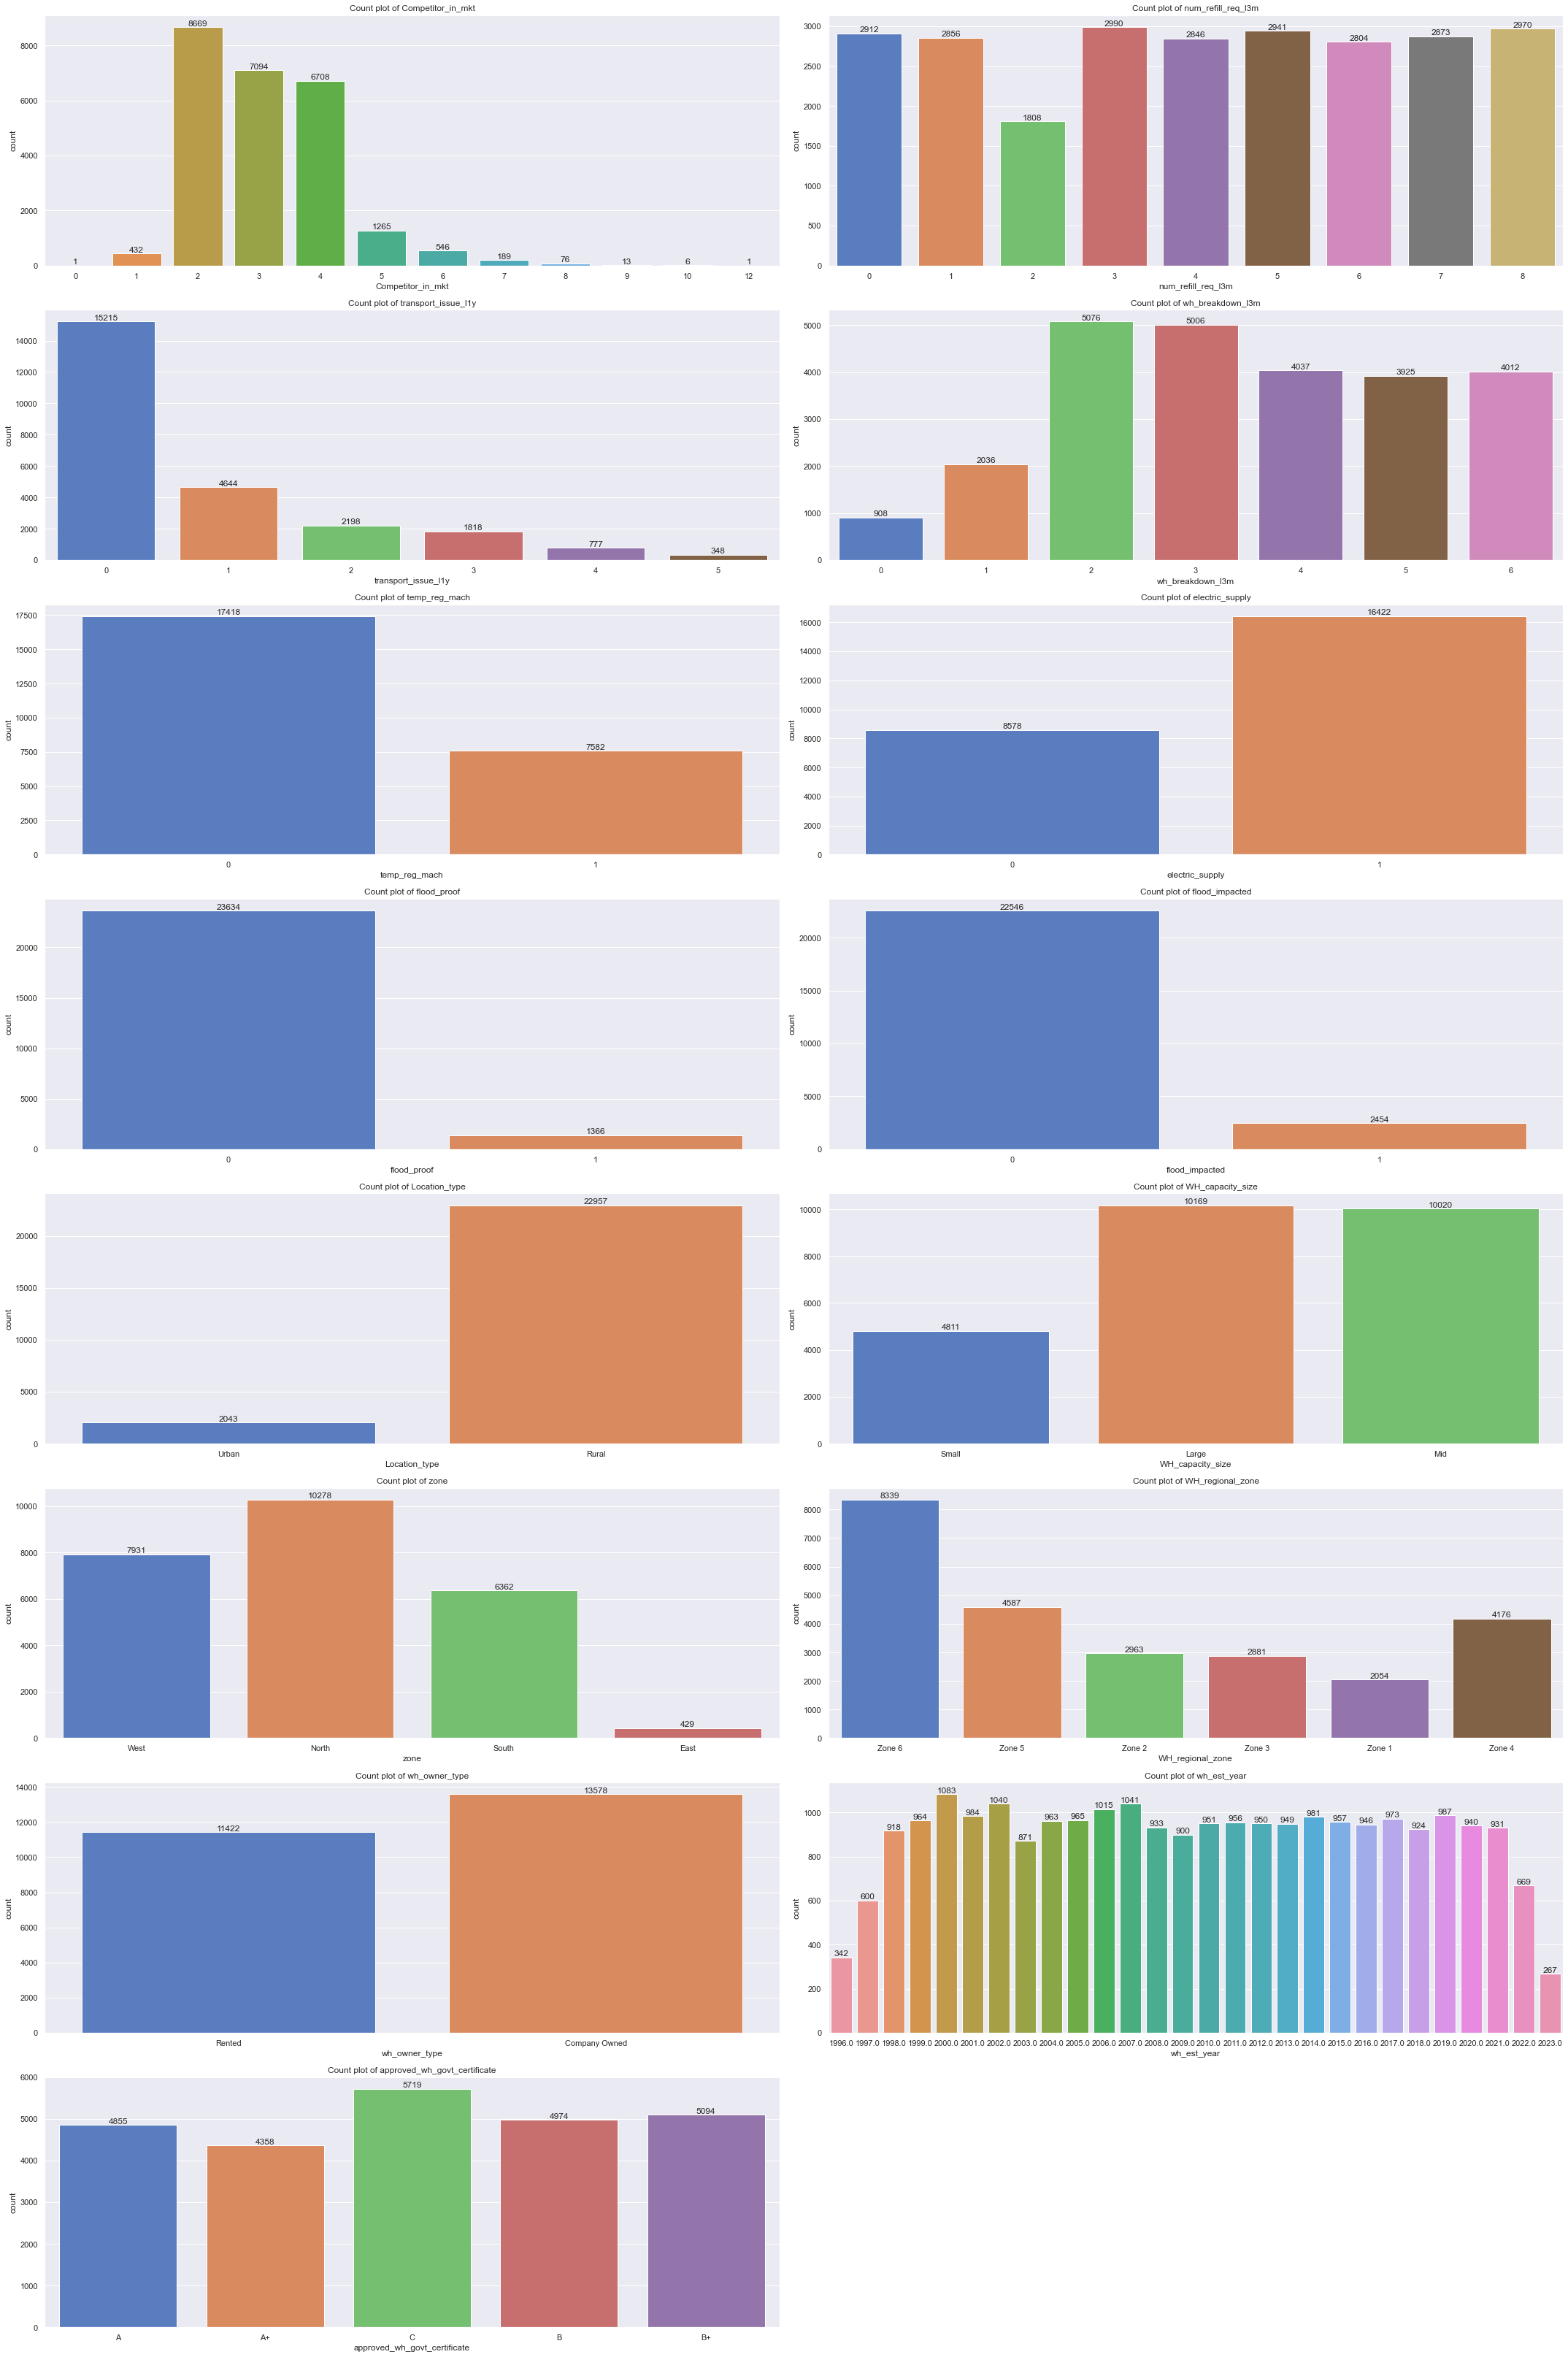

In [45]:
plt.figure(figsize=(30,45))
for i in b:
    plt.subplot(8,2,i+1);
    bar_graph = sns.countplot(data_cat[data_cat_col[i]]);
    bar_graph.bar_label(bar_graph.containers[0])
    plt.title("Count plot of {}".format(data_cat_col[i]))
    plt.tight_layout();

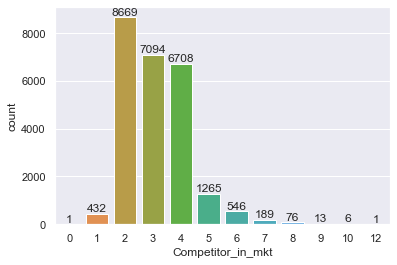

In [46]:
bar_graph = sns.countplot(data_cat['Competitor_in_mkt']);
bar_graph.bar_label(bar_graph.containers[0]);

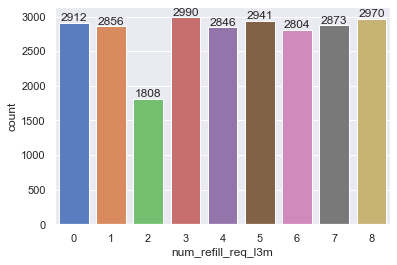

In [47]:
bar_graph = sns.countplot(data_cat['num_refill_req_l3m']);
bar_graph.bar_label(bar_graph.containers[0]);

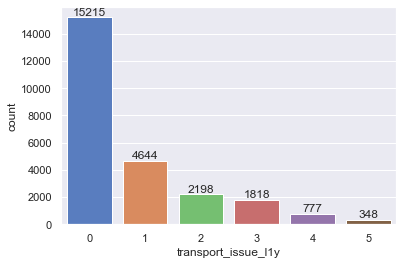

In [48]:
bar_graph = sns.countplot(data_cat['transport_issue_l1y']);
bar_graph.bar_label(bar_graph.containers[0]);

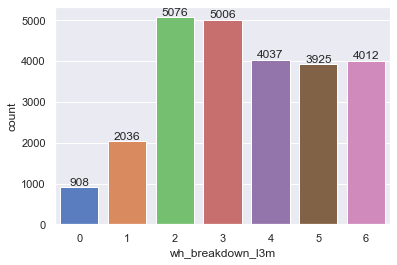

In [49]:
bar_graph = sns.countplot(data_cat['wh_breakdown_l3m']);
bar_graph.bar_label(bar_graph.containers[0]);

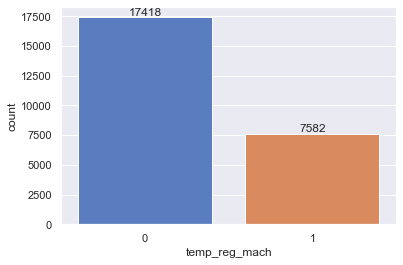

In [50]:
bar_graph = sns.countplot(data_cat['temp_reg_mach']);
bar_graph.bar_label(bar_graph.containers[0]);

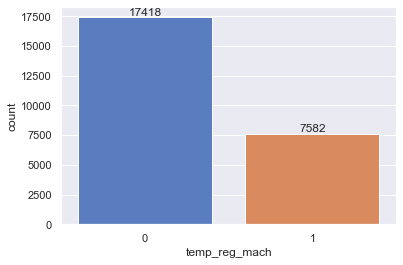

In [51]:
bar_graph = sns.countplot(data_cat['temp_reg_mach']);
bar_graph.bar_label(bar_graph.containers[0]);

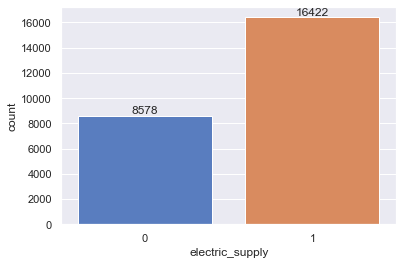

In [52]:
bar_graph = sns.countplot(data_cat['electric_supply']);
bar_graph.bar_label(bar_graph.containers[0]);

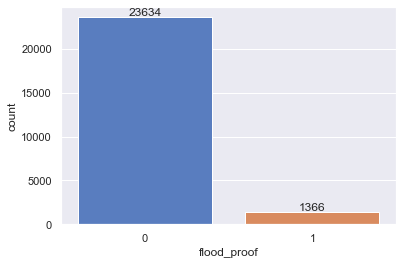

In [53]:
bar_graph = sns.countplot(data_cat['flood_proof']);
bar_graph.bar_label(bar_graph.containers[0]);

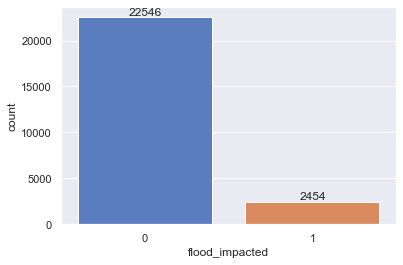

In [54]:
bar_graph = sns.countplot(data_cat['flood_impacted']);
bar_graph.bar_label(bar_graph.containers[0]);

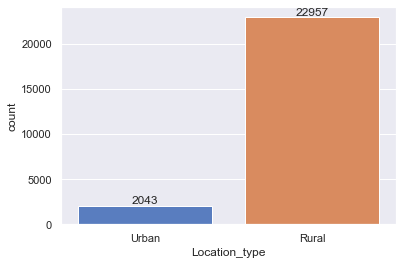

In [55]:
bar_graph = sns.countplot(data_cat['Location_type']);
bar_graph.bar_label(bar_graph.containers[0]);

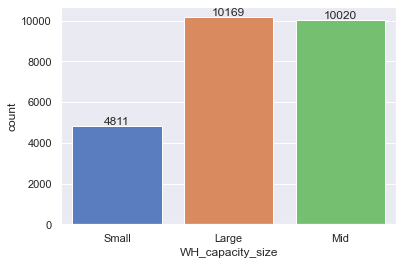

In [56]:
bar_graph = sns.countplot(data_cat['WH_capacity_size']);
bar_graph.bar_label(bar_graph.containers[0]);

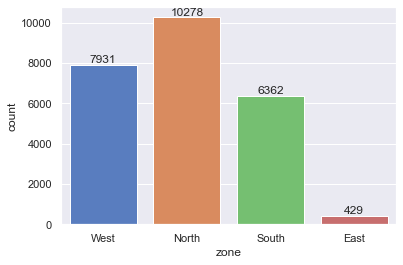

In [57]:
bar_graph = sns.countplot(data_cat['zone']);
bar_graph.bar_label(bar_graph.containers[0]);

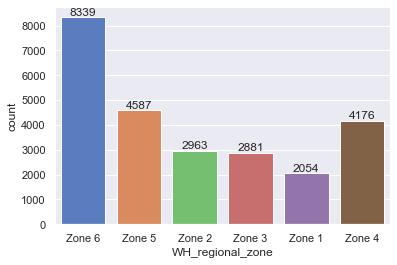

In [58]:
bar_graph = sns.countplot(data_cat['WH_regional_zone']);
bar_graph.bar_label(bar_graph.containers[0]);

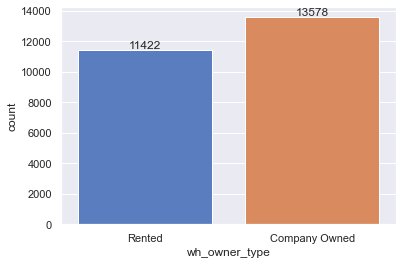

In [59]:
bar_graph = sns.countplot(data_cat['wh_owner_type']);
bar_graph.bar_label(bar_graph.containers[0]);

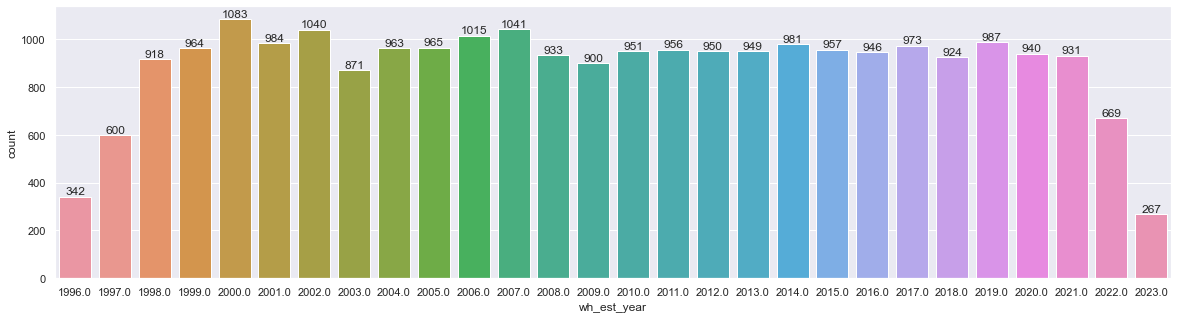

In [60]:
plt.figure(figsize=(20,5))
bar_graph = sns.countplot(data_cat['wh_est_year']);
bar_graph.bar_label(bar_graph.containers[0]);

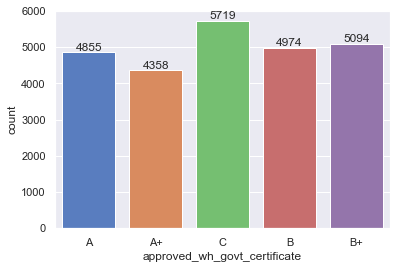

In [61]:
bar_graph = sns.countplot(data_cat['approved_wh_govt_certificate']);
bar_graph.bar_label(bar_graph.containers[0]);

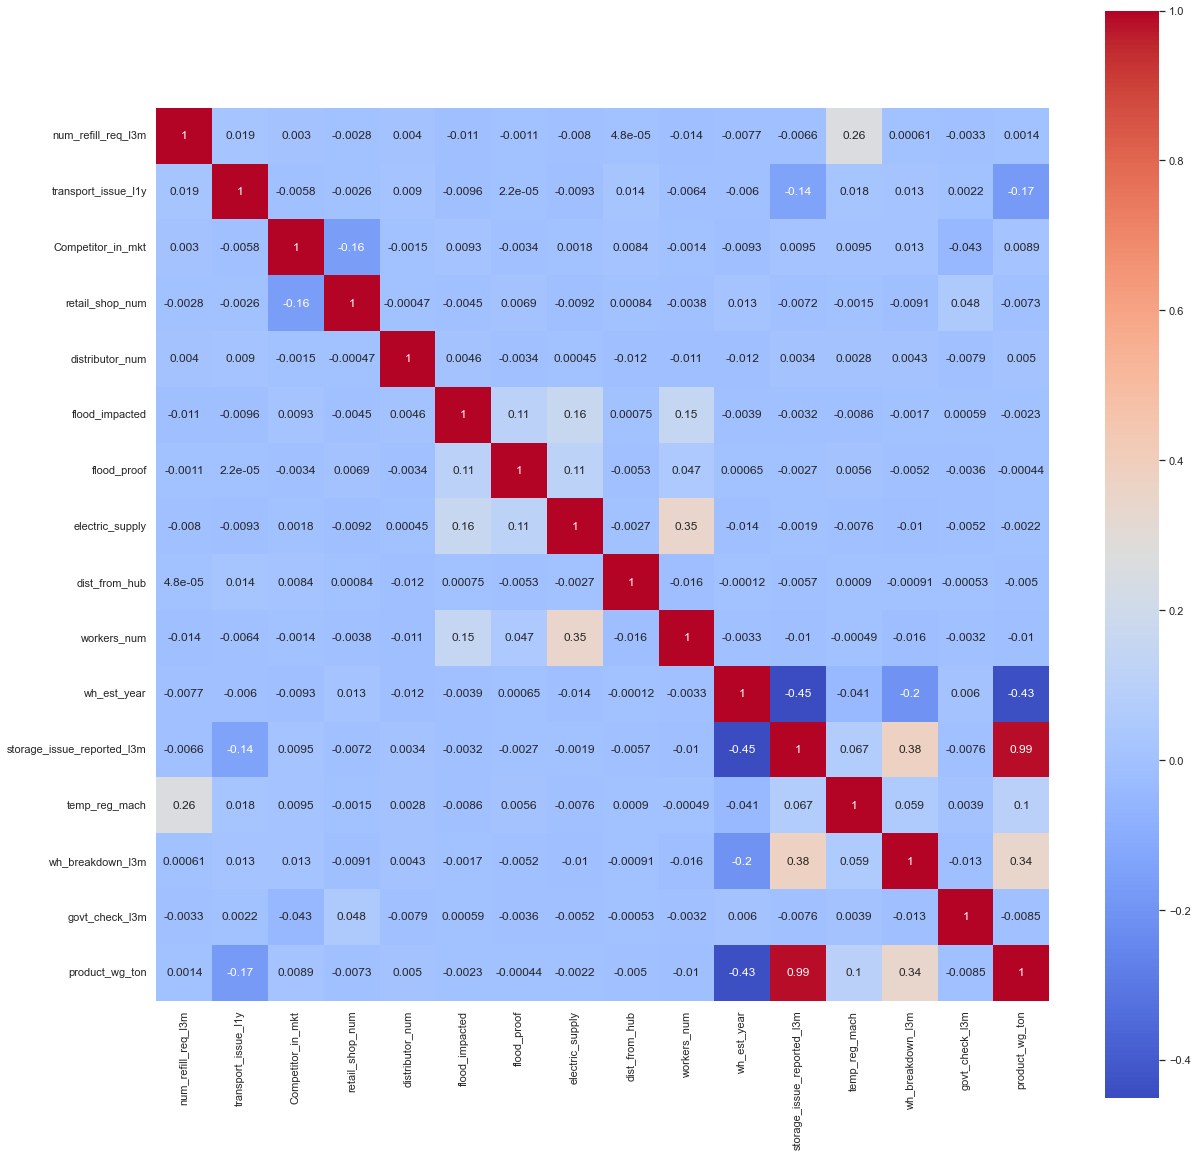

In [62]:
plt.figure(figsize=(20,20))
p=sns.heatmap(data.corr(), annot=True,cmap='coolwarm',square=True)

In [46]:
bins = [2065,17695.33,35390.67,55151]
labels = ['L','M','H']
data['weight_bin'] = pd.cut(data['product_wg_ton'],bins=bins,labels=labels)
data['weight_bin'].value_counts()

M    12608
L     9415
H     2976
Name: weight_bin, dtype: int64

In [47]:
data['Current_year']= 2022
data['age']= data['Current_year'] - data['wh_est_year']
bins = [-2,-1,0,9,17,26]
labels = ['YTE','<1Y','New','Med','Exp']
data['age_bin'] = pd.cut(data['age'],bins=bins,labels=labels)
data['age_bin'].value_counts()

New    8588
Exp    7765
Med    7711
<1Y     669
YTE     267
Name: age_bin, dtype: int64

data.to_excel('EDA_FILE_1.xlsx')

<b> For EDA refer to the below Tableau link

https://public.tableau.com/views/Capstone_16682732567430/CertificationVsweight?:language=en-GB&:display_count=n&:origin=viz_share_link

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 25000 non-null  object  
 1   WH_capacity_size              25000 non-null  object  
 2   zone                          25000 non-null  object  
 3   WH_regional_zone              25000 non-null  object  
 4   num_refill_req_l3m            25000 non-null  int64   
 5   transport_issue_l1y           25000 non-null  int64   
 6   Competitor_in_mkt             25000 non-null  int64   
 7   retail_shop_num               25000 non-null  float64 
 8   wh_owner_type                 25000 non-null  object  
 9   distributor_num               25000 non-null  int64   
 10  flood_impacted                25000 non-null  int64   
 11  flood_proof                   25000 non-null  int64   
 12  electric_supply               25000 non-null  

In [67]:
 data["Location_type"].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [68]:
 data["WH_capacity_size"].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

In [69]:
 data["zone"].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [70]:
data["WH_regional_zone"].value_counts()

Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64

In [71]:
data["wh_owner_type"].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

In [72]:
data["approved_wh_govt_certificate"].value_counts()

C     5719
B+    5094
B     4974
A     4855
A+    4358
Name: approved_wh_govt_certificate, dtype: int64

In [73]:
data["weight_bin"].value_counts()

M    12608
L     9415
H     2976
Name: weight_bin, dtype: int64

In [74]:
data["age_bin"].value_counts()

New    8588
Exp    7765
Med    7711
<1Y     669
YTE     267
Name: age_bin, dtype: int64

In [37]:
data.drop(['weight_bin','age_bin','age','Current_year'], axis = 1, inplace = True)

KeyError: "['weight_bin' 'age_bin' 'age' 'Current_year'] not found in axis"

## Encoding

In [38]:
data = pd.get_dummies(data, columns=['Location_type','wh_owner_type','WH_regional_zone'],drop_first=True)

In [39]:
data = pd.get_dummies(data, columns=['zone','WH_capacity_size'],drop_first=True)

In [40]:
data['approved_wh_govt_certificate']=np.where(data['approved_wh_govt_certificate'] =='A+', '1', data['approved_wh_govt_certificate'])
data['approved_wh_govt_certificate']=np.where(data['approved_wh_govt_certificate'] =='A', '2', data['approved_wh_govt_certificate'])
data['approved_wh_govt_certificate']=np.where(data['approved_wh_govt_certificate'] =='B+', '3', data['approved_wh_govt_certificate'])
data['approved_wh_govt_certificate']=np.where(data['approved_wh_govt_certificate'] =='B', '4', data['approved_wh_govt_certificate'])
data['approved_wh_govt_certificate']=np.where(data['approved_wh_govt_certificate'] =='C', '5', data['approved_wh_govt_certificate'])

In [41]:
data["approved_wh_govt_certificate"].value_counts()

5    5719
3    5094
4    4974
2    4855
1    4358
Name: approved_wh_govt_certificate, dtype: int64

In [42]:
data["approved_wh_govt_certificate"] = data["approved_wh_govt_certificate"].astype('int64')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_refill_req_l3m            25000 non-null  int64  
 1   transport_issue_l1y           25000 non-null  int64  
 2   Competitor_in_mkt             25000 non-null  int64  
 3   retail_shop_num               25000 non-null  float64
 4   distributor_num               25000 non-null  int64  
 5   flood_impacted                25000 non-null  int64  
 6   flood_proof                   25000 non-null  int64  
 7   electric_supply               25000 non-null  int64  
 8   dist_from_hub                 25000 non-null  int64  
 9   workers_num                   25000 non-null  float64
 10  wh_est_year                   25000 non-null  float64
 11  storage_issue_reported_l3m    25000 non-null  int64  
 12  temp_reg_mach                 25000 non-null  int64  
 13  a

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
X = data.drop('product_wg_ton', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
18,WH_regional_zone_Zone 2,inf
19,WH_regional_zone_Zone 3,inf
20,WH_regional_zone_Zone 4,inf
26,WH_capacity_size_Mid,inf
10,wh_est_year,209.607485
3,retail_shop_num,28.410337
23,zone_North,27.459556
25,zone_West,20.627975
9,workers_num,19.409699
24,zone_South,17.843253


In [46]:
X = X.drop(['WH_regional_zone_Zone 2','WH_regional_zone_Zone 3','WH_regional_zone_Zone 4','WH_capacity_size_Mid'], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,wh_est_year,174.669232
3,retail_shop_num,28.286791
20,zone_North,27.213563
22,zone_West,20.545471
9,workers_num,19.408315
21,zone_South,17.653008
2,Competitor_in_mkt,10.751355
4,distributor_num,7.976227
8,dist_from_hub,7.806096
15,govt_check_l3m,6.972057


In [47]:
X = X.drop(['wh_est_year','retail_shop_num','zone_North','zone_West','workers_num'], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Competitor_in_mkt,7.606842
3,distributor_num,6.882135
7,dist_from_hub,6.779952
11,wh_breakdown_l3m,5.916842
12,govt_check_l3m,5.658911
10,approved_wh_govt_certificate,5.560800
8,storage_issue_reported_l3m,5.223457
0,num_refill_req_l3m,3.607780
6,electric_supply,3.019293
14,wh_owner_type_Rented,1.901989


In [48]:
X = X.drop(['Competitor_in_mkt'], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,distributor_num,6.649401
6,dist_from_hub,6.520766
10,wh_breakdown_l3m,5.850796
11,govt_check_l3m,5.494763
9,approved_wh_govt_certificate,5.371511
7,storage_issue_reported_l3m,5.166237
0,num_refill_req_l3m,3.579589
5,electric_supply,2.986183
13,wh_owner_type_Rented,1.891845
15,WH_regional_zone_Zone 6,1.769419


In [49]:
X = X.drop(['distributor_num'], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,dist_from_hub,6.300619
9,wh_breakdown_l3m,5.786102
10,govt_check_l3m,5.301439
8,approved_wh_govt_certificate,5.175968
6,storage_issue_reported_l3m,5.100978
0,num_refill_req_l3m,3.545884
4,electric_supply,2.947585
12,wh_owner_type_Rented,1.876801
14,WH_regional_zone_Zone 6,1.758592
7,temp_reg_mach,1.643851


In [50]:
X = X.drop(['dist_from_hub'], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,wh_breakdown_l3m,5.696635
5,storage_issue_reported_l3m,5.017895
9,govt_check_l3m,5.003918
7,approved_wh_govt_certificate,4.900918
0,num_refill_req_l3m,3.500917
4,electric_supply,2.896160
11,wh_owner_type_Rented,1.859105
13,WH_regional_zone_Zone 6,1.741153
6,temp_reg_mach,1.637904
1,transport_issue_l1y,1.423033


In [51]:
X = X.drop(['wh_breakdown_l3m'], axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,govt_check_l3m,4.899737
7,approved_wh_govt_certificate,4.807978
5,storage_issue_reported_l3m,3.800284
0,num_refill_req_l3m,3.485383
4,electric_supply,2.877205
10,wh_owner_type_Rented,1.848336
12,WH_regional_zone_Zone 6,1.735769
6,temp_reg_mach,1.629826
14,WH_capacity_size_Small,1.417972
1,transport_issue_l1y,1.402753


In [52]:
y = data[['product_wg_ton']]

In [53]:
X.rename(columns = {'WH_regional_zone_Zone 6':'WH_regional_zone_Zone_6'}, inplace = True)

In [54]:
X.rename(columns = {'WH_regional_zone_Zone 5':'WH_regional_zone_Zone_5'}, inplace = True)

In [55]:
X.head()

,num_refill_req_l3m,transport_issue_l1y,flood_impacted,flood_proof,electric_supply,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,govt_check_l3m,Location_type_Urban,wh_owner_type_Rented,WH_regional_zone_Zone_5,WH_regional_zone_Zone_6,zone_South,WH_capacity_size_Small
0,3,1,0,1,1,13,0,2,15,1,1,0,1,0,1
1,0,0,0,0,1,4,0,2,17,0,0,1,0,0,0
2,1,0,0,0,0,17,0,2,22,0,0,0,0,1,0
3,7,4,0,0,0,17,1,1,27,0,1,0,0,0,0
4,3,1,1,0,1,18,0,5,24,0,0,1,0,0,0


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## <b> Linear Regression Using SKLearn

In [95]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [96]:
regression_model.score(X_train, y_train)

0.9766228255849292

In [97]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.9777848844745285

In [98]:
from sklearn import metrics
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1780.4493861257195

In [99]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1716.9875771641414

In [100]:
# predict Weight (ton) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

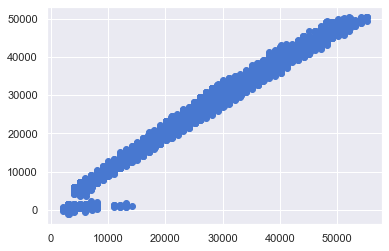

In [101]:
plt.scatter(y_test, y_pred);

In [102]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for num_refill_req_l3m is 5.113618159497854
The coefficient for transport_issue_l1y is -331.39392984860854
The coefficient for flood_impacted is 13.183268574567105
The coefficient for flood_proof is 68.74044986308895
The coefficient for electric_supply is 15.650965076944031
The coefficient for storage_issue_reported_l3m is 1236.4647876259755
The coefficient for temp_reg_mach is 699.5693348487
The coefficient for approved_wh_govt_certificate is -264.8158367784477
The coefficient for govt_check_l3m is 0.9160086927380959
The coefficient for Location_type_Urban is -130.39319824651915
The coefficient for wh_owner_type_Rented is 2.757255707187049
The coefficient for WH_regional_zone_Zone_5 is -30.189227977648024
The coefficient for WH_regional_zone_Zone_6 is -16.105771441377513
The coefficient for zone_South is -32.9798879383124
The coefficient for WH_capacity_size_Small is 28.826099918355613


In [103]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1768.5190414723074


In [104]:
from scipy.stats import zscore

In [105]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [106]:
#from sklearn.linear_model import LinearRegression
regression_model_scaled = LinearRegression()
regression_model_scaled.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [107]:
regression_model_scaled.score(X_train_scaled, y_train_scaled)

0.9766228255849292

In [108]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model_scaled.score(X_test_scaled, y_test_scaled)

0.9777954929980444

In [109]:
#RMSE on Scaled Training data
predicted_train_scaled=regression_model_scaled.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train_scaled))

0.15289595944651663

In [110]:
#RMSE on scaled Testing data
predicted_test_scaled=regression_model_scaled.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test_scaled))

0.1490117679982209

In [111]:
# predict Weight (ton) for a set of attributes not in the training or test set
y_pred_scaled = regression_model_scaled.predict(X_test_scaled)

In [112]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_scaled.coef_[0][idx]))

The coefficient for num_refill_req_l3m is 0.0011447926483805911
The coefficient for transport_issue_l1y is -0.03415341439502659
The coefficient for flood_impacted is 0.00033324402607302515
The coefficient for flood_proof is 0.0013275235164866871
The coefficient for electric_supply is 0.0006378335438895432
The coefficient for storage_issue_reported_l3m is 0.9759524652060922
The coefficient for temp_reg_mach is 0.02768311224607415
The coefficient for approved_wh_govt_certificate is -0.03204518208134336
The coefficient for govt_check_l3m is 0.0006785565987493033
The coefficient for Location_type_Urban is -0.003059490265203465
The coefficient for wh_owner_type_Rented is 0.00011793384857191388
The coefficient for WH_regional_zone_Zone_5 is -0.0010032207420646428
The coefficient for WH_regional_zone_Zone_6 is -0.0006527600305621267
The coefficient for zone_South is -0.0012351945882370463
The coefficient for WH_capacity_size_Small is 0.0009747875587679928


In [113]:
intercept = regression_model_scaled.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.9680059370914093e-16


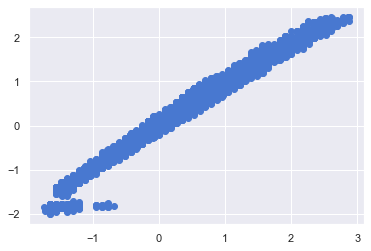

In [114]:
plt.scatter(y_test_scaled, y_pred_scaled);

## Linear Regression using Stats Model

In [115]:
data_train_LR = pd.concat([X_train, y_train], axis=1)
data_test_LR = pd.concat([X_test,y_test],axis=1)
data_train_LR.head()

,num_refill_req_l3m,transport_issue_l1y,flood_impacted,flood_proof,electric_supply,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,govt_check_l3m,Location_type_Urban,wh_owner_type_Rented,WH_regional_zone_Zone_5,WH_regional_zone_Zone_6,zone_South,WH_capacity_size_Small,product_wg_ton
4289,0,2,0,0,1,20,0,4,14,0,1,1,0,0,0,23086
19621,6,2,0,0,1,15,1,1,30,0,1,0,0,0,1,19108
14965,6,0,0,0,1,31,0,4,11,0,1,0,0,0,0,38125
12321,6,1,0,0,1,28,0,4,2,0,0,0,1,1,1,33123
6269,4,4,0,0,1,23,0,3,26,1,0,0,0,0,0,26089


In [116]:
expr= 'product_wg_ton ~ num_refill_req_l3m + transport_issue_l1y + flood_impacted + flood_proof + electric_supply + storage_issue_reported_l3m + temp_reg_mach + approved_wh_govt_certificate + govt_check_l3m + Location_type_Urban + wh_owner_type_Rented + WH_regional_zone_Zone_5 + WH_regional_zone_Zone_6 + zone_South + WH_capacity_size_Small'

In [117]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train_LR).fit()
lm1.params

Intercept                       1768.519041
num_refill_req_l3m                 5.113618
transport_issue_l1y             -331.393930
flood_impacted                    13.183269
flood_proof                       68.740450
electric_supply                   15.650965
storage_issue_reported_l3m      1236.464788
temp_reg_mach                    699.569335
approved_wh_govt_certificate    -264.815837
govt_check_l3m                     0.916009
Location_type_Urban             -130.393198
wh_owner_type_Rented               2.757256
WH_regional_zone_Zone_5          -30.189228
WH_regional_zone_Zone_6          -16.105771
zone_South                       -32.979888
WH_capacity_size_Small            28.826100
dtype: float64

In [118]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.870e+04
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:22:51   Log-Likelihood:            -1.5581e+05
No. Observations:               17500   AIC:                         3.117e+05
Df Residuals:                   17484   BIC:                         3.118e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [119]:
#RMSE on training data
mse = np.mean((lm1.predict(data_train_LR.drop('product_wg_ton',axis=1))-data_train_LR['product_wg_ton'])**2)
np.sqrt(mse)

1780.4493861257108

In [120]:
#Prediction on test data
y_pred = lm1.predict(data_test_LR)

In [121]:
#RMSE on testing data
mse = np.mean((lm1.predict(data_test_LR.drop('product_wg_ton',axis=1))-data_test_LR['product_wg_ton'])**2)
np.sqrt(mse)

1716.987577164144

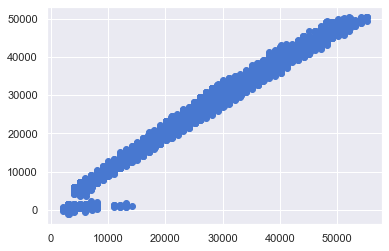

In [122]:
plt.scatter(y_test, y_pred)
plt.show()

In [123]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1768.52) * Intercept + (5.11) * num_refill_req_l3m + (-331.39) * transport_issue_l1y + (13.18) * flood_impacted + (68.74) * flood_proof + (15.65) * electric_supply + (1236.46) * storage_issue_reported_l3m + (699.57) * temp_reg_mach + (-264.82) * approved_wh_govt_certificate + (0.92) * govt_check_l3m + (-130.39) * Location_type_Urban + (2.76) * wh_owner_type_Rented + (-30.19) * WH_regional_zone_Zone_5 + (-16.11) * WH_regional_zone_Zone_6 + (-32.98) * zone_South + (28.83) * WH_capacity_size_Small + 

In [124]:
expr_temp= 'product_wg_ton ~ transport_issue_l1y + storage_issue_reported_l3m + temp_reg_mach + approved_wh_govt_certificate + Location_type_Urban'

In [125]:
lm2 = smf.ols(formula= expr_temp, data = data_train_LR).fit()
lm2.params

Intercept                       1806.292389
transport_issue_l1y             -331.411264
storage_issue_reported_l3m      1236.415693
temp_reg_mach                    707.364012
approved_wh_govt_certificate    -264.326725
Location_type_Urban             -129.482017
dtype: float64

In [126]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.461e+05
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:22:52   Log-Likelihood:            -1.5581e+05
No. Observations:               17500   AIC:                         3.116e+05
Df Residuals:                   17494   BIC:                         3.117e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [127]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1806.29) * Intercept + (-331.41) * transport_issue_l1y + (1236.42) * storage_issue_reported_l3m + (707.36) * temp_reg_mach + (-264.33) * approved_wh_govt_certificate + (-129.48) * Location_type_Urban + 

In [128]:
y_pred = lm2.predict(data_train_LR)

In [129]:
#RMSE on training data
mse = np.mean((lm2.predict(data_train_LR.drop('product_wg_ton',axis=1))-data_train_LR['product_wg_ton'])**2)
np.sqrt(mse)

1780.720001206534

In [130]:
y_pred = lm2.predict(data_test_LR)

In [131]:
#RMSE on testing data
mse = np.mean((lm2.predict(data_test_LR.drop('product_wg_ton',axis=1))-data_test_LR['product_wg_ton'])**2)
np.sqrt(mse)

1716.7562527794246

## Decision Tree Regressor

In [132]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
dt_model = DecisionTreeRegressor(criterion = 'squared_error',random_state=1 )

In [134]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

from sklearn import tree
clf = tree.DecisionTreeRegressor(criterion = 'squared_error',random_state=1)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file='tree.dot')

from sklearn.tree import export_graphviz
ins_Tree_File = open('ins_tree.dot','w')
dot_data = export_graphviz(dt_model, out_file =ins_Tree_File,
               feature_names = list(X_train))
ins_Tree_File.close()

In [135]:
X_train.shape

(17500, 15)

In [136]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                                   Imp
num_refill_req_l3m            0.001466
transport_issue_l1y           0.001255
flood_impacted                0.000206
flood_proof                   0.000111
electric_supply               0.000413
storage_issue_reported_l3m    0.982813
temp_reg_mach                 0.000867
approved_wh_govt_certificate  0.009550
govt_check_l3m                0.001712
Location_type_Urban           0.000141
wh_owner_type_Rented          0.000461
WH_regional_zone_Zone_5       0.000228
WH_regional_zone_Zone_6       0.000277
zone_South                    0.000327
WH_capacity_size_Small        0.000171


In [137]:
y_train_predict = dt_model.predict(X_train)
y_test_predict = dt_model.predict(X_test)

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [139]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9998234967431613


In [140]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 154.707007413553


In [141]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.987840955357782


In [142]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 1270.259908961475


## Regularizing the Decision Tree

In [143]:
reg_dt_model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_leaf=10, min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=30)

In [144]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                   Imp
num_refill_req_l3m            0.000255
transport_issue_l1y           0.001049
flood_impacted                0.000015
flood_proof                   0.000000
electric_supply               0.000022
storage_issue_reported_l3m    0.988384
temp_reg_mach                 0.000788
approved_wh_govt_certificate  0.009256
govt_check_l3m                0.000148
Location_type_Urban           0.000005
wh_owner_type_Rented          0.000017
WH_regional_zone_Zone_5       0.000011
WH_regional_zone_Zone_6       0.000020
zone_South                    0.000020
WH_capacity_size_Small        0.000010


In [145]:
y_train_predict = reg_dt_model.predict(X_train)
y_test_predict = reg_dt_model.predict(X_test)

In [146]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.994138632902596


In [147]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 891.524093990892


In [148]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9935268427347803


In [149]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 926.8318381453826


In [150]:
reg_dt_model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_leaf=20, min_samples_split=60)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=60)

In [151]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                   Imp
num_refill_req_l3m            0.000221
transport_issue_l1y           0.000961
flood_impacted                0.000017
flood_proof                   0.000000
electric_supply               0.000011
storage_issue_reported_l3m    0.988836
temp_reg_mach                 0.000624
approved_wh_govt_certificate  0.009240
govt_check_l3m                0.000060
Location_type_Urban           0.000002
wh_owner_type_Rented          0.000007
WH_regional_zone_Zone_5       0.000001
WH_regional_zone_Zone_6       0.000002
zone_South                    0.000013
WH_capacity_size_Small        0.000004


In [152]:
y_train_predict = reg_dt_model.predict(X_train)
y_test_predict = reg_dt_model.predict(X_test)

In [153]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9936736328853283


In [154]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 926.2128858006068


In [155]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9935104166391938


In [156]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 928.0070438323149


### Gridsearch Cross validation

In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:

param_grid = {
    'max_depth': [7, 9, 10, 12],
    'min_samples_leaf': [10, 15, 20, 25],
    'min_samples_split': [30, 45, 60, 75]
}

reg_dt_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 5)

In [159]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 9, 10, 12],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [30, 45, 60, 75]})

In [160]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 45}

In [161]:
best_grid = grid_search.best_estimator_

In [162]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)

In [163]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9939638985849011


In [164]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 904.7152015893471


In [165]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9935521536174463


In [166]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 925.0180471503294


In [167]:

param_grid = {
    'max_depth': [7, 9, 10, 12],
    'min_samples_leaf': [5, 10, 15, 20],
    'min_samples_split': [15, 30, 45, 60]
}

reg_dt_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 5)

In [168]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 9, 10, 12],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [15, 30, 45, 60]})

In [169]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 15}

In [170]:
best_grid = grid_search.best_estimator_

In [171]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)

In [172]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9939109447324057


In [173]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 908.6750042488638


In [174]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9935839025842323


In [175]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 922.7378587749059


In [176]:

param_grid = {
    'max_depth': [7, 9, 10, 12],
    'min_samples_leaf': [3, 4, 5, 10],
    'min_samples_split': [9, 12, 15, 30]
}

reg_dt_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 5)

In [177]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 9, 10, 12],
                         'min_samples_leaf': [3, 4, 5, 10],
                         'min_samples_split': [9, 12, 15, 30]})

In [178]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 12}

In [179]:
best_grid = grid_search.best_estimator_

In [180]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)

In [181]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9939182306969432


In [182]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 908.1311961175228


In [183]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9935756651143934


In [184]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 923.3300090074349


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
rfcl = RandomForestRegressor(n_estimators = 501)
rfcl = rfcl.fit(X_train, y_train)

In [187]:
y_train_predict = rfcl.predict(X_train)
y_test_predict = rfcl.predict(X_test)

In [188]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9988757508956324


In [189]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 390.44952500325104


In [190]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9930002859347212


In [191]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 963.7913290321317


### Grid Search Cross validation

In [192]:
param_grid = {
    'max_depth': [9,10],
    'max_features': [6, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [101, 301, 501]
}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 3)




In [193]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 10], 'max_features': [6, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [101, 301, 501]})

In [194]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 301}

In [195]:
best_grid = grid_search.best_estimator_

In [196]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)

In [197]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9927528805860262


In [198]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 991.3256248156332


In [199]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9919764468192971


In [200]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 1031.8729615531643


## Bagging

In [58]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf_model = RandomForestRegressor()
Bagging_model=BaggingRegressor(base_estimator=rf_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=100,
                 random_state=1)

In [60]:
y_train_predict = Bagging_model.predict(X_train)
y_test_predict = Bagging_model.predict(X_test)

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [63]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9974582598574928


In [64]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 587.0825847932825


In [65]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9934857538274204


In [66]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 929.7687562555332


## Adaboost

In [67]:
from sklearn.ensemble import AdaBoostRegressor

In [68]:
ADB_model = AdaBoostRegressor(base_estimator=rf_model, n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(), n_estimators=100,
                  random_state=1)

In [69]:
y_train_predict = ADB_model.predict(X_train)
y_test_predict = ADB_model.predict(X_test)

In [70]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9986515873523798


In [71]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 427.60722284059267


In [72]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9930832715438501


In [73]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 958.0611463401661


## Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
gb_model = GradientBoostingRegressor(random_state=1)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [76]:
y_train_predict = gb_model.predict(X_train)
y_test_predict = gb_model.predict(X_test)

In [77]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9935302255420558


In [78]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 936.6518477994007


In [79]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9938621958006918


In [80]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 902.5045080688191


## Grid search CV RF model

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [7,8,9],
    'min_samples_leaf': [10,20,30],
    'min_samples_split': [30,60,90],
    'n_estimators': [50,100,150]
}

rf_model = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10)

In [82]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [7, 8, 9],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [30, 60, 90],
                         'n_estimators': [50, 100, 150]})

In [83]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 150}

In [84]:
best_grid = grid_search.best_estimator_

In [85]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)

In [86]:
#R2 value on the training Predictions
print('The r_sq is:', r2_score(y_train,y_train_predict))

The r_sq is: 0.9938468134568379


In [87]:
#RMSE on training predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_train,y_train_predict)))

The RMSE is: 913.4476534820124


In [88]:
#R2 value on the testing Predictions
print('The r_sq is:', r2_score(y_test,y_test_predict))

The r_sq is: 0.9935566518040813


In [89]:
#RMSE on testing predictions
print('The RMSE is:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

The RMSE is: 924.6953324397103
